In [156]:
import csv
import feather # pip install feather-format
import numpy as np
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import geopandas as gpd
%matplotlib inline

# importing the data


In [35]:
reviews_data_path = "data/reviews.csv"
listings_data_path = "data/listings.csv"
calendar_data_path = "data/calendar.csv"
neighbors_data_path = "data/neighbourhoods.csv"
neighbors_geojson_path = "data/neighbourhoods.geojson"

def convert_to_feather(csvfilepath):
    df = pd.read_csv(csvfilepath)
    filename_no_ext = os.path.split(os.path.splitext(csvfilepath)[0])[1]
    filepath_feather = "feather/"+filename_no_ext+".feather"
    feather.write_dataframe(df, filepath_feather)
    print(filepath_feather, "is converted/written")

# # Convert to feather: Single execution
# for csvfilepath in [reviews_data_path, listings_data_path, calendar_data_path]:
#     convert_to_feather(csvfilepath)


## Data from feather

In [36]:
reviews_data_path = "feather/reviews.feather"
listings_data_path = "feather/listings.feather"
calendar_data_path = "feather/calendar.feather"

reviews_data = pd.read_feather(reviews_data_path)
listings_data = pd.read_feather(listings_data_path)
calendar_data = pd.read_feather(calendar_data_path)

## Reviews Data

In [37]:
print("reviews data shape", reviews_data.shape)
reviews_data.head()

reviews data shape (115655, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


## Listing Data

In [38]:
print("Listings data shape", listings_data.shape)
listings_data.head()

Listings data shape (3043, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210712150755,2021-07-12,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,4.95,4.85,4.90,None,f,1,1,0,0,0.29
1,5506,https://www.airbnb.com/rooms/5506,20210712150755,2021-07-12,**Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,...,4.89,4.52,4.78,Approved by the government,f,9,9,0,0,0.90
2,6695,https://www.airbnb.com/rooms/6695,20210712150755,2021-07-12,Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,4.95,4.48,4.70,STR446650,f,9,9,0,0,1.37
3,10730,https://www.airbnb.com/rooms/10730,20210712150755,2021-07-12,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Beacon Hill is located downtown and is conveni...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,...,4.92,4.96,4.43,None,f,5,5,0,0,0.41
4,10813,https://www.airbnb.com/rooms/10813,20210712150755,2021-07-12,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,...,5.00,5.00,4.75,None,f,11,11,0,0,0.18


## Calendar Data

In [39]:
print("calendar data shape", calendar_data.shape)
calendar_data.head()

calendar data shape (1110686, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2021-07-12,f,$125.00,$125.00,32,1125
1,1644031,2021-07-12,f,$100.00,$90.00,1,1125
2,1644031,2021-07-13,f,$100.00,$90.00,1,1125
3,1644031,2021-07-14,f,$100.00,$90.00,1,1125
4,1644031,2021-07-15,f,$100.00,$100.00,1,1125


# Data Cleaning

Data cleaning depending on needs
- Reviews Data can be used for word cloud
- Listings Data can be used for price prediction, heatmapping, 
- calendar data for exploring pricing changes over time/season/weekend, availability?

### features to develop
- closeness to landmarks
- season pricing
- weekend pricing
- availability as indicator of good pricing; avaialbility30 category indicates # of days available for next 30 days 
- onehot encode certain features
- for some features like minimum_nights, -> make them categorical then onehot; for example, min3 becomes short term, min10 medium term, min30 long term


### some considerations
- individual reviews has no review score; may require positive negative sentiment analysis depending on feature needs
- clustering different properties by rating categories and scores

In [41]:
print(reviews_data.dtypes)
print(reviews_data.shape)
# print(reviews_data.isnull().sum())
reviews_data = reviews_data.dropna()
print(reviews_data.shape)

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object
(115572, 6)


In [47]:
print(listings_data.dtypes)
print(listings_data.shape)
listings_data['number_of_reviews'].isnull().sum() # No null value for column "number_of_reviews"


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object
(3043, 74)


0

In [95]:
# features necessary - delete rows with null
features_none_null = ["id","host_id","host_since","host_response_rate","host_acceptance_rate",
                        "host_response_time",
                        "host_is_superhost", "host_verifications",
                        "host_has_profile_pic", "host_identity_verified",
                        "neighbourhood_cleansed", "latitude", "longitude",
                        "room_type", "accommodates", "amenities", "price", "minimum_nights", 
                        "availability_30",	"availability_60",	"availability_90","availability_365", 
                        "number_of_reviews", "review_scores_rating", 
                        "review_scores_accuracy",	"review_scores_cleanliness",	"review_scores_checkin",	"review_scores_communication",
                        "review_scores_location",	"review_scores_value",
                        "instant_bookable", 
                        ]

df_none_null = listings_data.copy(deep = True)[features_none_null]

print("before droppign null columns: ", df_none_null.shape)
for col in features_none_null:
    df_none_null = df_none_null[df_none_null[col].notna()]
    # print(col, df_none_null.shape)
print("after droppign null columns: ", df_none_null.shape)

## most null columns - host_response_rate,review_scores general

before droppign null columns:  (3043, 31)
after droppign null columns:  (1678, 31)


In [64]:
_test = df_none_null['host_since'][4]
_test

'2009-09-16'

In [121]:
reference_date = datetime.datetime(2021,7,12)
datetime_object = datetime.datetime.strptime(_test, '%Y-%m-%d')
datetime_object2 = datetime.datetime.strptime(df_none_null['host_since'][8], '%Y-%m-%d')

# adding custom: host_number_of_years
host_number_of_years = [(reference_date - datetime.datetime.strptime(i, '%Y-%m-%d')).days/365
                        for i in df_none_null['host_since']]
df_none_null["host_number_of_years"] = host_number_of_years
df_none_null['price'] = df_none_null['price'].map(lambda x:float(x[1:].replace(',', '')))


<AxesSubplot:xlabel='host_number_of_years', ylabel='review_scores_rating'>

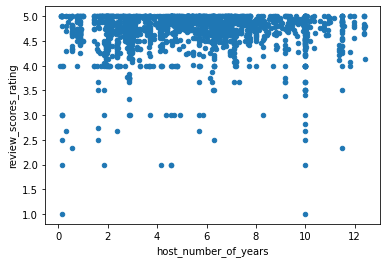

In [103]:
# number of host years VS. ratings/price
df_none_null.plot.scatter(x="host_number_of_years", y="review_scores_rating")

<AxesSubplot:xlabel='host_number_of_years', ylabel='price'>

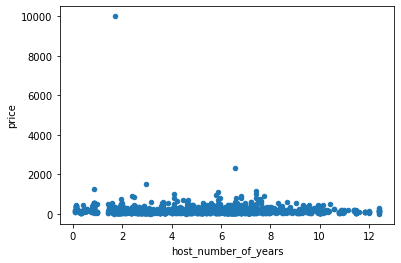

In [122]:
# number of host years VS. ratings/price
df_none_null.plot.scatter(x="host_number_of_years", y="price")

In [104]:
df_none_null.host_number_of_years.describe()

count    1678.000000
mean        5.509854
std         2.859154
min         0.073973
25%         2.964384
50%         5.695890
75%         7.164384
max        12.410959
Name: host_number_of_years, dtype: float64

(3.0, 5.0)

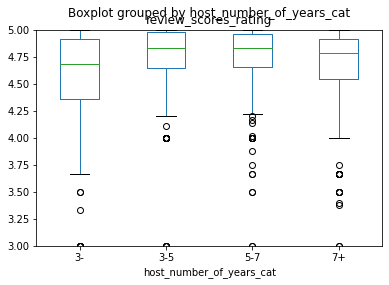

In [127]:
def categorize_years(year):
    if year>7:
        return "7+"
    if year>5:
        return "5-7"
    if year>3:
        return "3-5"
    else: return "3-"


df_none_null["host_number_of_years_cat"] = df_none_null["host_number_of_years"].map(categorize_years)

df_none_null.boxplot(by="host_number_of_years_cat", column=["review_scores_rating"], grid = False).set_ylim([3,5])

(0.0, 500.0)

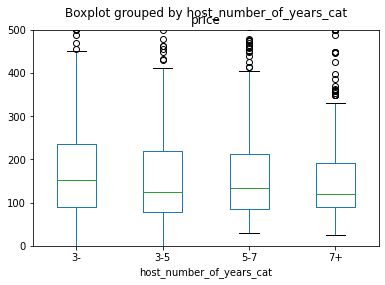

In [129]:

df_none_null.boxplot(by="host_number_of_years_cat", column=["price"], grid = False).set_ylim([0,500])

/Users/jingyu/.pyenv/versions/3.9.6/envs/lab4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 300.0)]

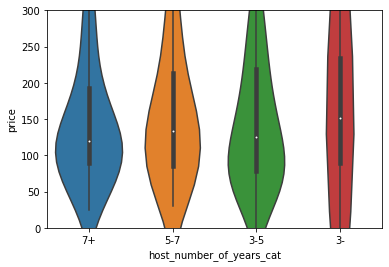

In [133]:
sns.violinplot("host_number_of_years_cat", "price", data=df_none_null).set(ylim=(0,300))

# neighborhood and pricing

/Users/jingyu/.pyenv/versions/3.9.6/envs/lab4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 500.0), None]

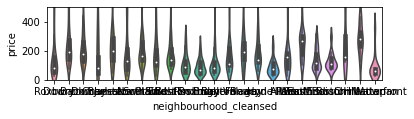

In [150]:
# neighbourhood_cleansed vs price
sns.violinplot("neighbourhood_cleansed", "price", data=df_none_null).set(ylim=(0,500),aspect=1/100)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

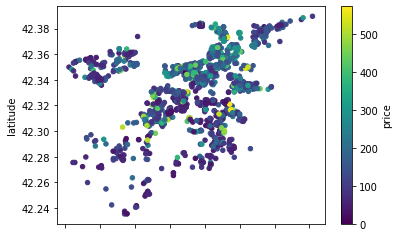

In [154]:
df_none_null = df_none_null[(np.abs(stats.zscore(df_none_null['price'])) < 3)]
df_none_null.plot.scatter(x="longitude",y="latitude", c="price",colormap='viridis')



<AxesSubplot:>

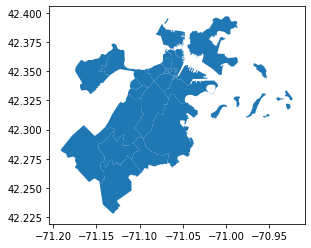

In [161]:
bostonGEO = gpd.read_file(neighbors_geojson_path)
bostonGEO.plot()

In [163]:
bostonGEO['neighbourhood'] #bostonGEO['geometry']

0                  Roslindale
1               Jamaica Plain
2                Mission Hill
3       Longwood Medical Area
4                 Bay Village
5            Leather District
6                   Chinatown
7                   North End
8                     Roxbury
9                   South End
10                   Back Bay
11                East Boston
12                Charlestown
13                   West End
14                Beacon Hill
15                   Downtown
16                     Fenway
17                   Brighton
18               West Roxbury
19                  Hyde Park
20                   Mattapan
21                 Dorchester
22    South Boston Waterfront
23               South Boston
24                    Allston
25             Harbor Islands
Name: neighbourhood, dtype: object

In [169]:
neighbourhoods_prices =[]
for i in bostonGEO['neighbourhood']:
    df_neighbour = df_none_null[df_none_null["neighbourhood_cleansed"]==i]
    # print(df_neighbour.shape)
    print(df_neighbour['price'].mean())
    to_append = df_neighbour['price'].mean()
    neighbourhoods_prices.append(to_append)
bostonGEO['price']=neighbourhoods_prices

90.96875
171.8230088495575
128.03846153846155
nan
169.97142857142856
nan
282.05
193.7948717948718
131.28082191780823
168.95275590551182
208.25233644859813
139.8235294117647
206.09803921568627
239.3125
176.38888888888889
222.24864864864864
198.875
106.36470588235294
108.61111111111111
86.44
88.57142857142857
120.50925925925925
210.86666666666667
160.77380952380952
142.93548387096774
nan


<AxesSubplot:>

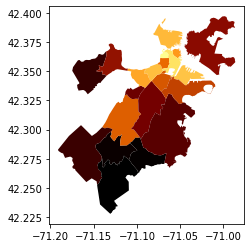

In [170]:
bostonGEO.plot(column='price', cmap='afmhot')

# patterns
- hosts with longer years doesn't necessarily have the best reviews ratings; lowest years tend to be more spread out
- hosts with more years tend to focus more on average priced units, where as beginner hosts are spread out on pricing.
- neighborhoods do vary quite significantly in pricing